<a href="https://colab.research.google.com/github/vikram2727/m.tech-thesis-work/blob/main/m_tech_final_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# import labirary

In [ ]:
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.utils import np_utils

# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)
plt.style.use("seaborn-white")
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
core_data =  pd.read_csv('/content/drive/MyDrive/WELL LOG ND CORE/15_9-19A-CORE.csv')

In [ ]:
well =pd.read_excel('/content/drive/MyDrive/WELL LOG ND CORE/train_final.xlsx')

In [ ]:
well

,DEPTH,BVW,PHIF,SW,VSH,KLOGH,CKV
0,3837.13,0.05,0.20,0.25,0.14,203.84,21.40
1,3838.50,0.05,0.13,0.34,0.11,109.31,1080.00
2,3839.41,0.04,0.15,0.27,0.07,332.80,5.36
3,3840.48,0.04,0.18,0.20,0.07,628.09,152.00
4,3841.39,0.04,0.22,0.17,0.07,1410.73,57.00
...,...,...,...,...,...,...,...
91,3961.49,0.16,0.19,0.85,0.34,295.07,59.90
92,3962.40,0.16,0.19,0.85,0.32,304.25,7.43
93,3963.62,0.14,0.15,0.94,0.39,8.89,110.00
94,3964.53,0.08,0.08,1.00,0.66,0.02,0.08


In [ ]:
well.describe()

,DEPTH,BVW,PHIF,SW,VSH,KLOGH,CKV
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,3901.58,0.07,0.17,0.48,0.22,465.57,538.65
std,37.94,0.04,0.06,0.33,0.15,1323.94,1549.84
min,3837.13,0.00,0.00,0.08,0.03,0.00,0.01
25%,3873.28,0.04,0.14,0.23,0.11,6.38,8.30
50%,3900.98,0.05,0.18,0.28,0.20,59.14,68.10
75%,3936.76,0.07,0.22,0.86,0.27,180.84,218.25
max,3965.45,0.17,0.25,1.00,0.73,7155.77,8190.00


In [ ]:
# using filter Moving Average Filter Using Convolution

In [ ]:
filter_length = 4
tair_moving_average = np.convolve(well['CKV'],np.ones((filter_length)),mode = 'same')
tair_moving_average /= filter_length

In [ ]:
tair_moving_average

array([2.7535000e+02, 2.7669000e+02, 3.1469000e+02, 3.2359000e+02,
       9.2590000e+01, 1.1825000e+02, 1.0287500e+02, 1.1862500e+02,
       8.3325000e+01, 8.1150000e+01, 6.6650000e+01, 4.8325000e+01,
       4.9175000e+01, 2.4353000e+01, 1.6266000e+01, 8.8410000e+00,
       6.1541000e+01, 6.5963000e+01, 1.7559250e+03, 3.3836750e+03,
       5.3739250e+03, 7.2225000e+03, 6.6625000e+03, 6.0105000e+03,
       4.0300000e+03, 2.1803750e+03, 1.0504495e+03, 7.1482000e+01,
       4.5782500e+00, 1.8453250e+01, 3.5453750e+01, 4.8421250e+01,
       6.3400000e+01, 1.2190000e+02, 2.0532500e+02, 2.4157500e+02,
       2.5095000e+02, 2.1895000e+02, 1.5870000e+02, 1.0968750e+02,
       1.1173750e+02, 9.7487500e+01, 7.8812500e+01, 1.0020000e+02,
       8.7300000e+01, 4.3280000e+02, 7.0122500e+02, 9.9860000e+02,
       1.0397500e+03, 7.8300000e+02, 6.6850000e+02, 4.0650000e+02,
       3.6710000e+02, 2.8860000e+02, 1.7285000e+02, 1.3515000e+02,
       1.8080000e+02, 1.5802500e+02, 1.1710000e+02, 1.5130000e

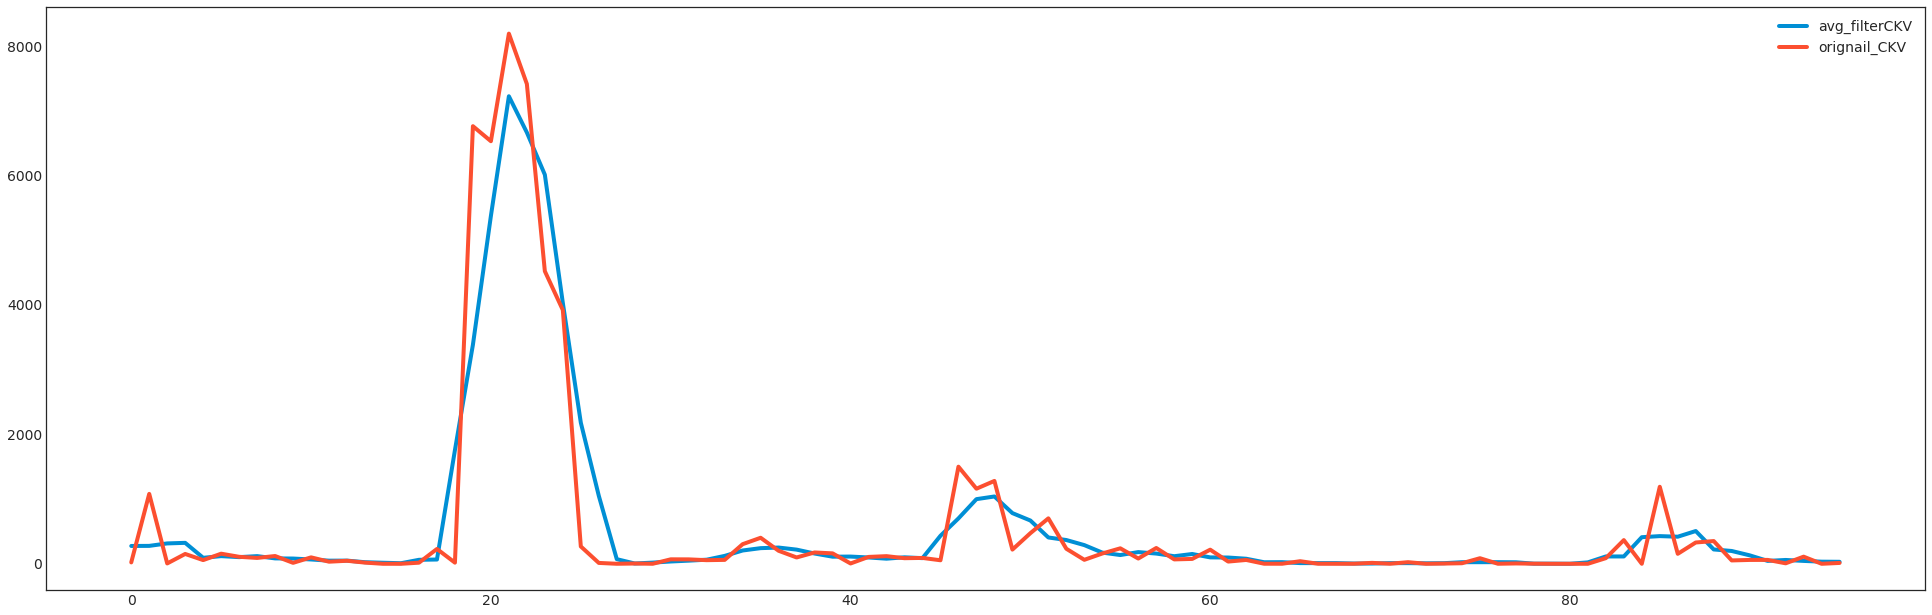

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(tair_moving_average , label= 'avg_filterCKV')
plt.plot(well['CKV'], label= 'orignail_CKV')
plt.legend()


In [ ]:
#Discrete Wavelet Transform (DWT) is wavelet filter
import pywt

In [ ]:
x = well['CKV'].values

In [ ]:
cA , cD = pywt.dwt(x, 'haar')

In [ ]:
y = pywt.idwt(cA , cD, 'haar')

In [ ]:
#print(cA) # Approximate coeffs


#print(cD) #Detail coeffs



#print(y)   ## smooth CKV

In [ ]:
np.array(cA)

array([7.78807409e+02, 1.11270323e+02, 1.50613744e+02, 1.40360696e+02,
       9.53179941e+01, 9.31966738e+01, 4.58912301e+01, 1.15965512e-01,
       1.73948268e+02, 4.79255763e+03, 1.04071976e+04, 8.43719811e+03,
       2.96136320e+03, 9.75665937e+00, 3.19258712e+00, 9.70857611e+01,
       8.22365187e+01, 4.98510281e+02, 2.11283506e+02, 2.37587878e+02,
       7.84534974e+01, 1.44461915e+02, 1.02459773e+02, 1.88090404e+03,
       1.05995306e+03, 8.30850468e+02, 2.07465130e+02, 2.81428499e+02,
       2.29951125e+02, 1.01257691e+02, 1.78403041e+02, 4.25819704e+01,
       2.87410622e+01, 6.81650937e-01, 1.07642865e+01, 1.81832509e+01,
       2.65801439e+00, 6.69559411e+01, 4.17122290e+00, 1.40926381e+00,
       1.97282792e-01, 3.20460793e+02, 8.41580106e+02, 3.41532575e+02,
       2.84964033e+02, 8.44285497e+01, 8.30355493e+01, 9.38754963e+00])

In [ ]:
colname1 =['CKV_smth_DWT']

In [ ]:
ckv1 = pd.DataFrame(y, columns=colname1)   ## ckv1 is the smooth CKV by using DWT

In [ ]:
colname = ["CKV_smooth"]

In [ ]:
ckv = pd.DataFrame(tair_moving_average, columns=colname) ## ckv is the smooth CKV by using avg_filter

In [ ]:
#plt.plot(tair_moving_average, well['CKV'].values)

In [ ]:
import scipy.signal as ss

In [ ]:
unfilter = well['VSH']
sg_filter = ss.savgol_filter(unfilter ,window_length=9, polyorder=2 )

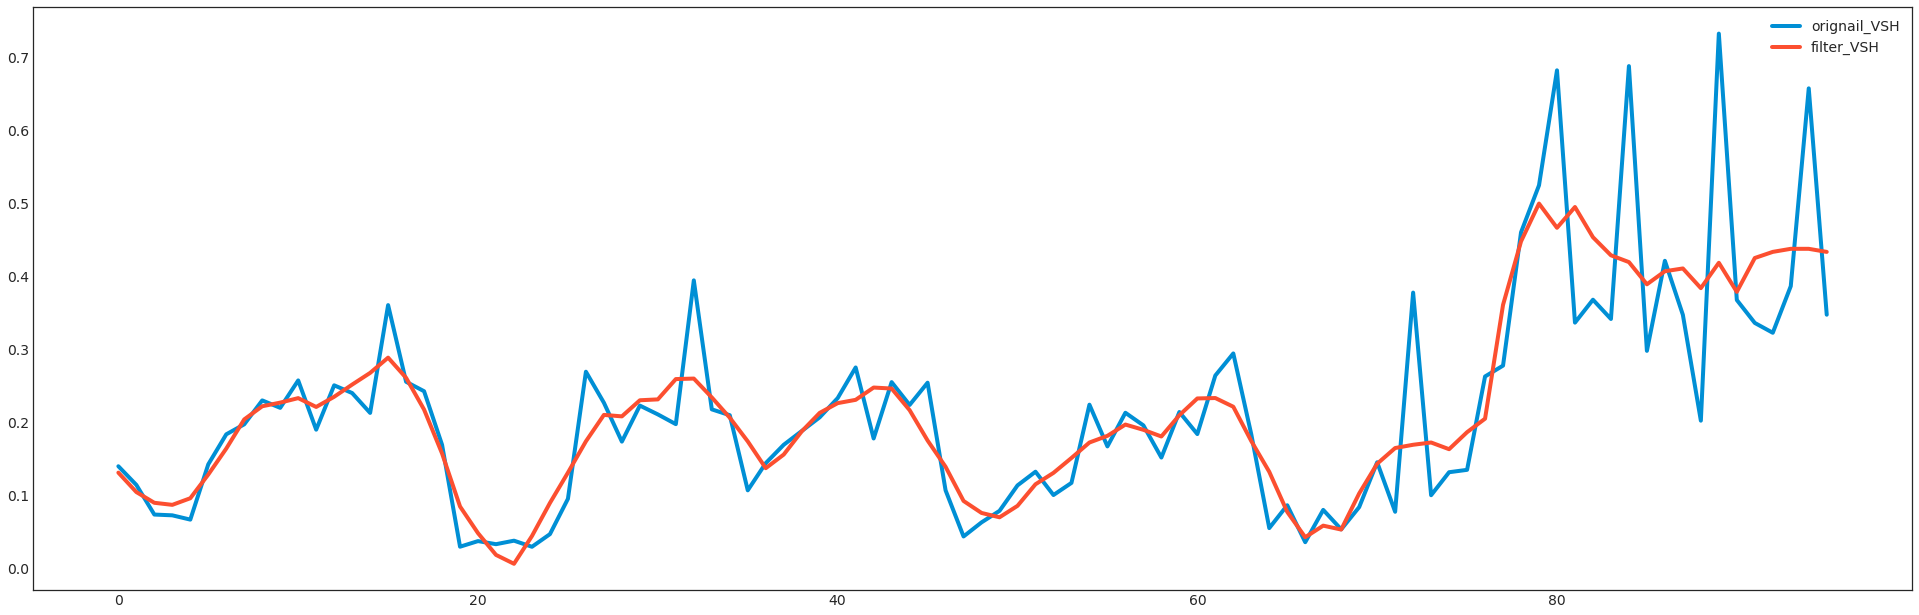

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(unfilter,label= 'orignail_VSH')
plt.plot(sg_filter, label = 'filter_VSH')
plt.legend()
plt.show()

In [ ]:
col = ['VSH_FIL']
VSH_FIL = pd.DataFrame(sg_filter, columns= col)
VSH_FIL

,VSH_FIL
0,0.13
1,0.10
2,0.09
3,0.09
4,0.10
...,...
91,0.43
92,0.43
93,0.44
94,0.44


In [ ]:
filter_length = 7
tair_moving_avg = np.convolve(well['KLOGH'],np.ones((filter_length)),mode = 'same')
tair_moving_avg /= filter_length

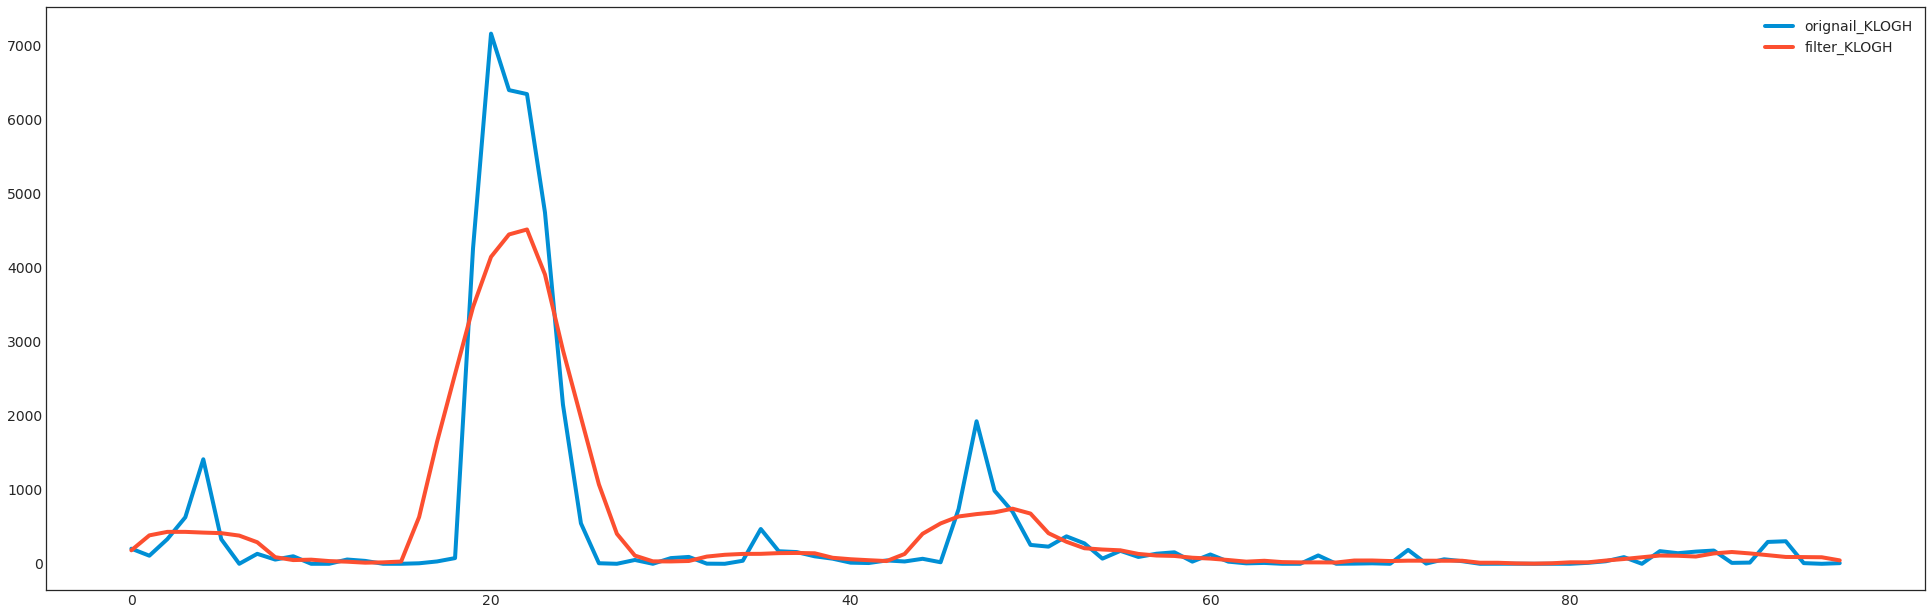

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(well['KLOGH'], label = 'orignail_KLOGH')
plt.plot(tair_moving_avg, label = 'filter_KLOGH')
plt.legend()
plt.show()

In [ ]:
col = ['KH_SMOOTH']

In [ ]:
kvH1 = pd.DataFrame(tair_moving_avg, columns=col)

In [ ]:
kvH1

,KH_SMOOTH
0,182.01
1,383.54
2,430.91
3,430.92
4,421.01
...,...
91,116.49
92,92.22
93,90.46
94,88.14


In [ ]:
well_ = pd.concat([well,VSH_FIL,kvH1,ckv],axis=1) 

In [ ]:
well_.head()

,DEPTH,BVW,PHIF,SW,VSH,KLOGH,CKV,VSH_FIL,KH_SMOOTH,CKV_smooth
0,3837.13,0.05,0.20,0.25,0.14,203.84,21.40,0.13,182.01,275.35
1,3838.50,0.05,0.13,0.34,0.11,109.31,1080.00,0.10,383.54,276.69
2,3839.41,0.04,0.15,0.27,0.07,332.80,5.36,0.09,430.91,314.69
3,3840.48,0.04,0.18,0.20,0.07,628.09,152.00,0.09,430.92,323.59
4,3841.39,0.04,0.22,0.17,0.07,1410.73,57.00,0.10,421.01,92.59


In [ ]:
well_train1 = well_.drop(['KLOGH','CKV','VSH'],axis = 1)

In [ ]:
## till now we smooth VSH, KH , coreKV

In [ ]:
well_train1.head()

,DEPTH,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth
0,3837.13,0.05,0.20,0.25,0.13,182.01,275.35
1,3838.50,0.05,0.13,0.34,0.10,383.54,276.69
2,3839.41,0.04,0.15,0.27,0.09,430.91,314.69
3,3840.48,0.04,0.18,0.20,0.09,430.92,323.59
4,3841.39,0.04,0.22,0.17,0.10,421.01,92.59


In [ ]:
well_train1.describe()

,DEPTH,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,3901.58,0.07,0.17,0.48,0.22,463.79,538.53
std,37.94,0.04,0.06,0.33,0.12,983.05,1362.67
min,3837.13,0.00,0.00,0.08,0.01,2.13,0.57
25%,3873.28,0.04,0.14,0.23,0.13,41.02,29.42
50%,3900.98,0.05,0.18,0.28,0.20,107.18,101.54
75%,3936.76,0.07,0.22,0.86,0.25,388.74,279.67
max,3965.45,0.17,0.25,1.00,0.50,4512.02,7222.50


In [ ]:
well_train1.shape

(96, 7)

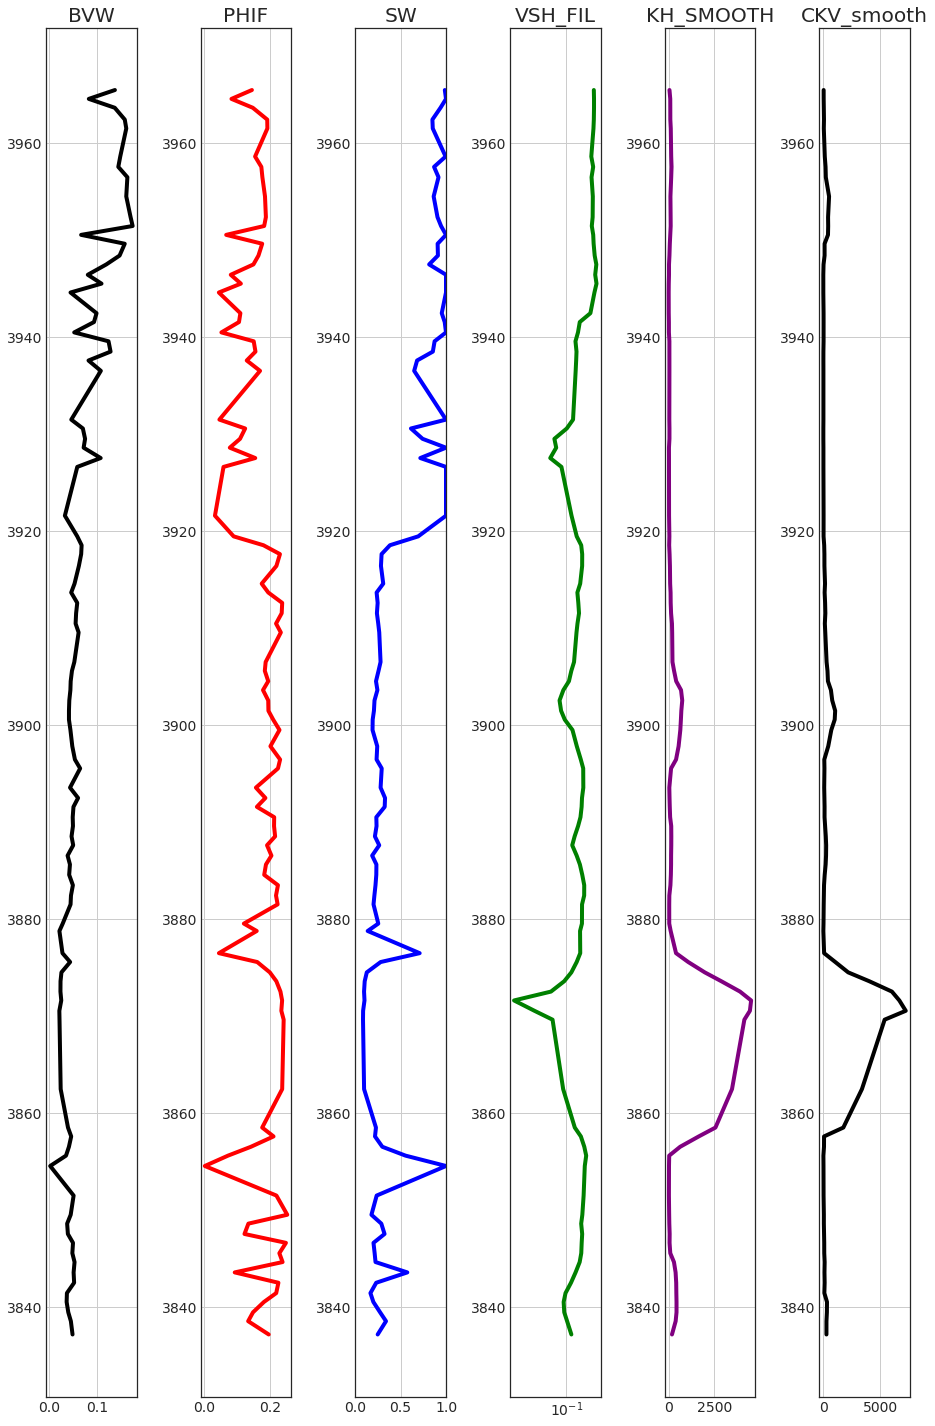

<Figure size 720x3600 with 0 Axes>

In [ ]:
# Display the train data
well = well_train1 

# define what logs are we going to us
logs = ['BVW',	'PHIF',	'SW',	'VSH_FIL','KH_SMOOTH','CKV_smooth']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(13,20))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 1)
plt.tight_layout(1)
plt.figure(figsize=(10,50)) 
plt.show()

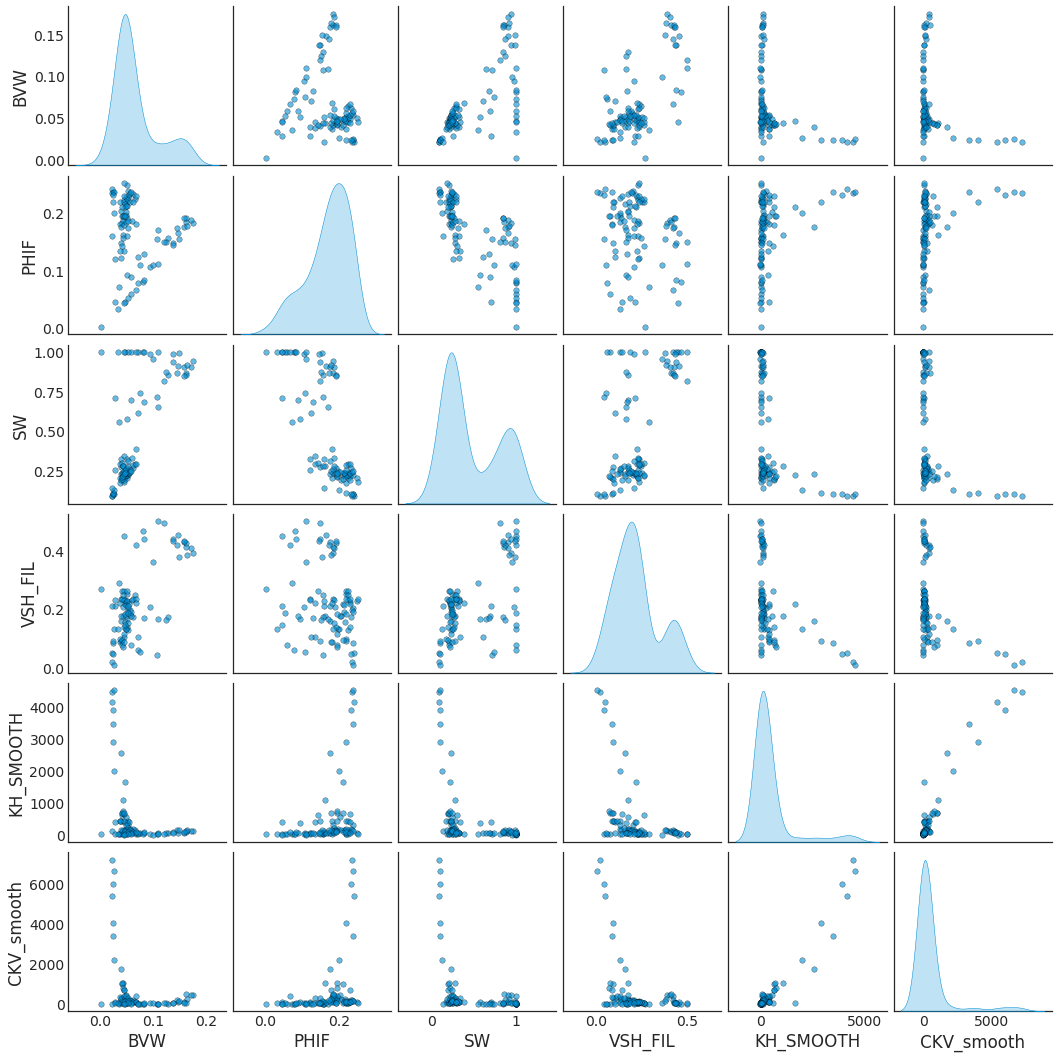

In [ ]:
train_features = ['BVW',	'PHIF',	'SW',	'VSH_FIL','KH_SMOOTH',	'CKV_smooth']

sns.pairplot(well_train1, vars=train_features, diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

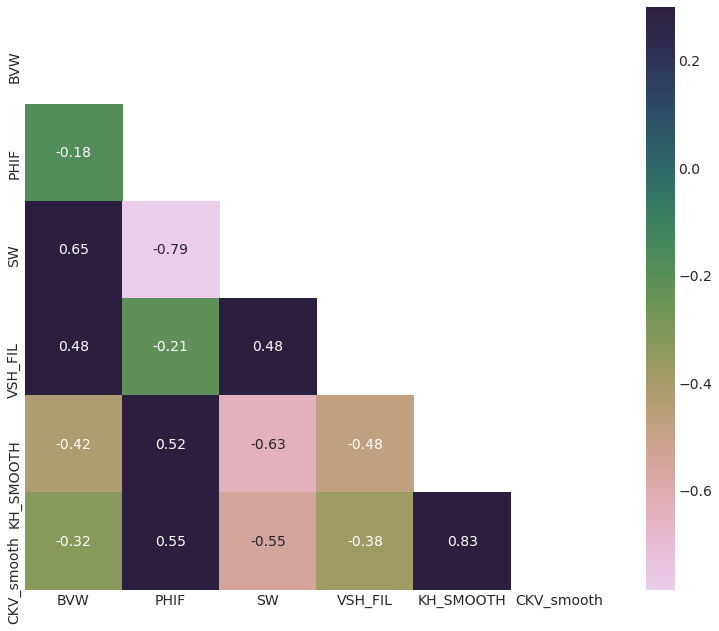

In [ ]:
well_train_only_features = well_train1[train_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

In [ ]:
colnames = well_train1.columns
only_feature = ['BVW',	'PHIF',	'SW','VSH_FIL','KH_SMOOTH'] # only feature column names
only_target = 'CKV_smooth' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['DEPTH', 'BVW', 'PHIF', 'SW', 'VSH_FIL', 'KH_SMOOTH', 'CKV_smooth'], dtype='object')

In [ ]:
well_train1

,DEPTH,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth
0,3837.13,0.05,0.20,0.25,0.13,182.01,275.35
1,3838.50,0.05,0.13,0.34,0.10,383.54,276.69
2,3839.41,0.04,0.15,0.27,0.09,430.91,314.69
3,3840.48,0.04,0.18,0.20,0.09,430.92,323.59
4,3841.39,0.04,0.22,0.17,0.10,421.01,92.59
...,...,...,...,...,...,...,...
91,3961.49,0.16,0.19,0.85,0.43,116.49,44.71
92,3962.40,0.16,0.19,0.85,0.43,92.22,59.21
93,3963.62,0.14,0.15,0.94,0.44,90.46,44.35
94,3964.53,0.08,0.08,1.00,0.44,88.14,32.68


In [ ]:
well_train1.to_csv('/content/sample_data/s.csv', index=False)

In [ ]:
well_train = well_train1.drop(['DEPTH'], axis=1)

In [ ]:
## normalization

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
scaler = PowerTransformer(method='yeo-johnson')

In [ ]:
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

In [ ]:
well_train_norm = ct.fit_transform(well_train)

In [ ]:
well_train_norm = pd.DataFrame(well_train_norm,columns= feature_target)
well_train_norm

,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth
0,-0.26,0.36,-0.62,-0.68,0.34,0.57
1,-0.40,-0.80,-0.18,-0.98,0.79,0.58
2,-0.64,-0.57,-0.48,-1.16,0.85,0.65
3,-0.81,0.04,-0.88,-1.19,0.85,0.66
4,-0.78,0.92,-1.09,-1.08,0.84,-0.03
...,...,...,...,...,...,...
91,1.80,0.27,1.18,1.54,0.05,-0.44
92,1.78,0.26,1.18,1.59,-0.11,-0.28
93,1.61,-0.58,1.31,1.61,-0.12,-0.44
94,0.78,-1.43,1.39,1.61,-0.14,-0.62


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x = well_train_norm[feature_target].astype(float)
y = well_train1['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y], axis=1)

In [ ]:
well_train_norm

,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth,DEPTH
0,-0.26,0.36,-0.62,-0.68,0.34,0.57,3837.13
1,-0.40,-0.80,-0.18,-0.98,0.79,0.58,3838.50
2,-0.64,-0.57,-0.48,-1.16,0.85,0.65,3839.41
3,-0.81,0.04,-0.88,-1.19,0.85,0.66,3840.48
4,-0.78,0.92,-1.09,-1.08,0.84,-0.03,3841.39
...,...,...,...,...,...,...,...
91,1.80,0.27,1.18,1.54,0.05,-0.44,3961.49
92,1.78,0.26,1.18,1.59,-0.11,-0.28,3962.40
93,1.61,-0.58,1.31,1.61,-0.12,-0.44,3963.62
94,0.78,-1.43,1.39,1.61,-0.14,-0.62,3964.53


In [ ]:
# droping outliers

In [ ]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['DEPTH'], axis=1)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 96
Number of points after outliers removed with Isolation Forest  : 86
Number of points after outliers removed with Outlier Factor    : 67
Number of points after outliers removed with One-class SVM     : 86
Number of points after outliers removed with Min. Covariance   : 86
Number of points after outliers removed with Standard Deviation: 95


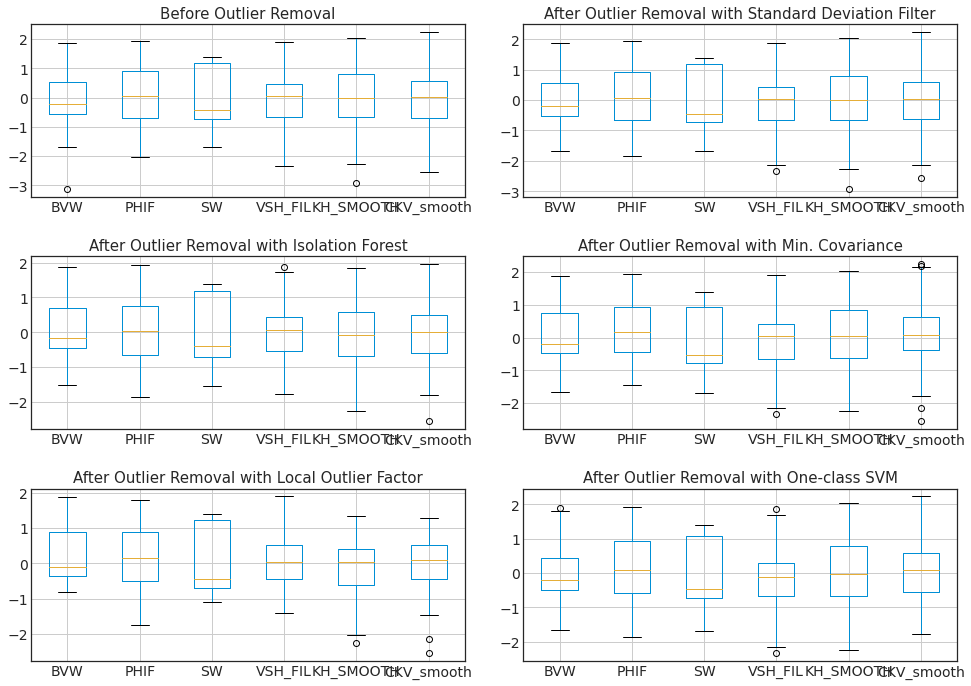

In [ ]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))

plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

In [ ]:
#sns.pairplot(well_train_svm, kind="kde")

In [ ]:
well_train_svm

,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth,DEPTH
0,-0.26,0.36,-0.62,-0.68,0.34,0.57,3837.13
1,-0.40,-0.80,-0.18,-0.98,0.79,0.58,3838.50
3,-0.81,0.04,-0.88,-1.19,0.85,0.66,3840.48
4,-0.78,0.92,-1.09,-1.08,0.84,-0.03,3841.39
5,-0.13,1.11,-0.70,-0.70,0.83,0.11,3842.46
...,...,...,...,...,...,...,...
90,1.71,-0.47,1.38,1.29,0.17,0.17,3958.59
92,1.78,0.26,1.18,1.59,-0.11,-0.28,3962.40
93,1.61,-0.58,1.31,1.61,-0.12,-0.44,3963.62
94,0.78,-1.43,1.39,1.61,-0.14,-0.62,3964.53


In [ ]:
# well_train_svm traning dataset is ready for machine learning model after removal of outliers 
# from 96 row now we have only 84 rows that means there are 12 out of range datapoints

In [ ]:
# defining some functions for regression
# Regression

def reg_metrics(test, pred):
    '''Function returns basic metrics for regression models'''
    print('Mean Absolute Error:', metrics.mean_absolute_error(test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(test, pred))
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(test, pred)))
    print('R Squared:', (metrics.r2_score(test, pred)))

def reg_plot(test, pred):
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()

In [ ]:
a = ['BVW',	'PHIF',	'SW','VSH_FIL','KH_SMOOTH']

In [ ]:
x = well_train_svm[a].values

In [ ]:
b = ['CKV_smooth']

In [ ]:
y = well_train_svm[b].values

In [ ]:
y

array([[ 5.73907234e-01],
       [ 5.76531691e-01],
       [ 6.60923858e-01],
       [-2.67960208e-02],
       [ 1.09948857e-01],
       [ 3.22133920e-02],
       [ 1.11711932e-01],
       [-8.60463270e-02],
       [-1.00938449e-01],
       [-2.12110732e-01],
       [-3.94857713e-01],
       [-3.84913646e-01],
       [-7.87656613e-01],
       [-1.36491199e+00],
       [-2.57314667e-01],
       [ 1.54054482e+00],
       [ 1.86604092e+00],
       [ 2.09043585e+00],
       [ 2.23164998e+00],
       [ 2.19326897e+00],
       [ 2.14410866e+00],
       [ 1.95133045e+00],
       [ 1.64893025e+00],
       [ 1.27952749e+00],
       [-9.46987951e-01],
       [-5.72002659e-01],
       [-3.93722774e-01],
       [-2.40435788e-01],
       [ 1.26869288e-01],
       [ 4.14397345e-01],
       [ 5.02985287e-01],
       [ 5.23654816e-01],
       [ 4.49467083e-01],
       [ 2.72995586e-01],
       [ 6.80414381e-02],
       [ 7.83745677e-02],
       [ 2.10269265e-03],
       [-1.17407823e-01],
       [ 1.7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (60, 5)
Shape of Training y: (60, 1)
Shape of Test X: (26, 5)
Shape of Test y: (26, 1)


In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])  #Compiling the ANN

In [ ]:
ann.fit(X_train, y_train, batch_size = 15, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.7956 - accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7769 - accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7396 - accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7217 - accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7047 - accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6525 - accuracy: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 

In [ ]:
y_pred = ann.predict(X_test)

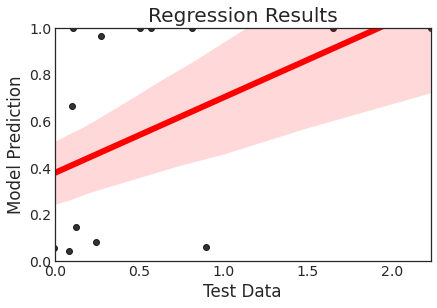

In [ ]:
reg_plot(y_test, y_pred)

In [ ]:
reg_metrics(y_test, y_pred)

Mean Absolute Error: 0.7334466476108445
Mean Squared Error: 0.7679640869439931
Root Mean Squared Error: 0.8763356017782189
R Squared: 0.16218262796631022


In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
reg_metrics(y_test, y_pred)

Mean Absolute Error: 0.3537195635458852
Mean Squared Error: 0.19618064219800296
Root Mean Squared Error: 0.4429228400048963
R Squared: 0.7859749526253572


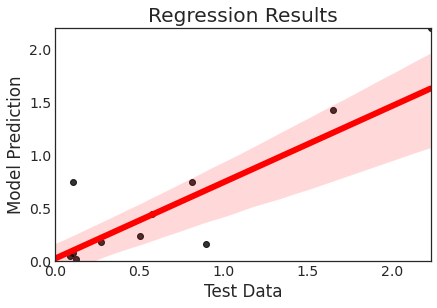

In [ ]:
reg_plot(y_test, y_pred)

In [ ]:
##models

[0.04383583]
[[-0.06495316  0.13470663  0.01994053  0.06304336  0.81886617]]


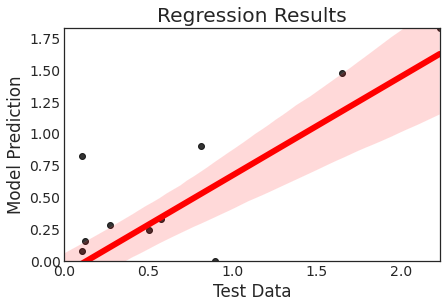

Mean Absolute Error: 0.3655023796388908
Mean Squared Error: 0.24145717838604186
Root Mean Squared Error: 0.4913829243940431
R Squared: 0.7365801056412984


In [ ]:
# 1. MLR - Multi Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # training the algorithm
print(lin_reg.intercept_)  # intercept
print(lin_reg.coef_)  # coefficients
# Prediction on test data
y_pred_lin = lin_reg.predict(X_test)
# Regression Plot - Linear Regression
reg_plot(y_test, y_pred_lin)
#scatter_plot_comparison(y_test, y_pred_lin)
# Metrics for Linear Regression
reg_metrics(y_test, y_pred_lin)

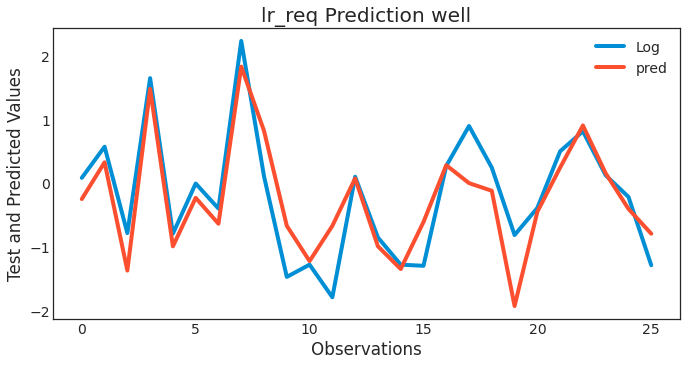

In [ ]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test,label = "Log")
plt.plot(y_pred_lin,label ="pred")
plt.title("Test and Predicted Values")
plt.title('lr_req Prediction well')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [ ]:
 y_pred_t = lin_reg.predict(X_train)

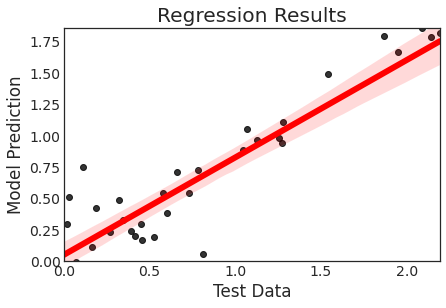

In [ ]:
reg_plot(y_train, y_pred_t)

In [ ]:
reg_metrics(y_train, y_pred_t)

Mean Absolute Error: 0.31416288824729105
Mean Squared Error: 0.17547825504201928
Root Mean Squared Error: 0.418901247362692
R Squared: 0.7759839943391138


In [ ]:
# 2. Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
y_pred2 = dt_reg.predict(X_train)

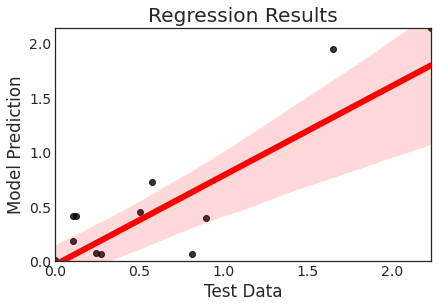

In [ ]:
reg_plot(y_test, y_pred_dt)

In [ ]:
reg_metrics(y_test, y_pred_dt)

Mean Absolute Error: 0.41301619025171527
Mean Squared Error: 0.28457109715583423
Root Mean Squared Error: 0.533452057035901
R Squared: 0.6895445857050442


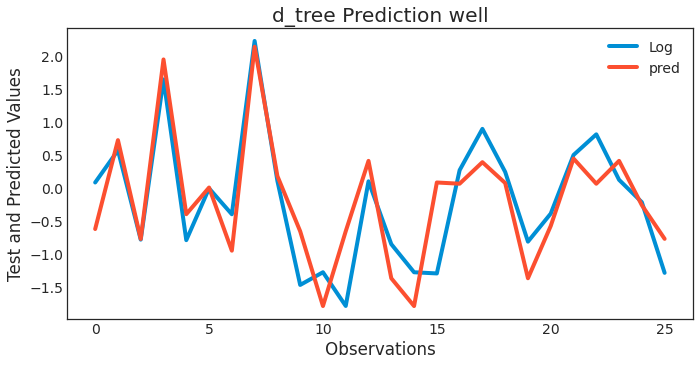

In [ ]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test,label = "Log")
plt.plot(y_pred_dt,label ="pred")
plt.title("Test and Predicted Values")
plt.title('d_tree Prediction well')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Create the regressor
model = GradientBoostingRegressor()
# print(model)

# Fit the regressor to the training data
model.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_gb = model.predict(X_test)

In [ ]:
reg_metrics(y_test, y_pred_gb)

Mean Absolute Error: 0.30868902810736293
Mean Squared Error: 0.15512365272641807
Root Mean Squared Error: 0.39385740151280396
R Squared: 0.8307664469250207


In [ ]:
model_H = GradientBoostingRegressor()

## Hyperparameters
max_depth = [5, 50]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 4]
min_samples_split = [2, 5]
n_estimators = [50, 1000]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}

## Randomized CV
model_random = GridSearchCV(model_H, param_grid, cv=10)
model_random.fit(X_train, y_train)

## print best model
model_random.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [ ]:
y_pred = model_random.predict(X_test)

In [ ]:
reg_metrics(y_test, y_pred)

Mean Absolute Error: 0.3118933099426214
Mean Squared Error: 0.1601363267130854
Root Mean Squared Error: 0.40017037210803774
R Squared: 0.8252978248660343


In [ ]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
reg_metrics(y_test, y_pred_rf)

Mean Absolute Error: 0.24688080262925
Mean Squared Error: 0.12195280201325784
Root Mean Squared Error: 0.34921741367414344
R Squared: 0.866954486763202


In [ ]:
target = 'CKV_smooth'

In [ ]:
y = well_train1[target].values
scaler.fit(y.reshape(-1,1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [ ]:
y_pred_t = scaler.inverse_transform(y_pred_t.reshape(-1,1))

In [ ]:
y_pred_dt = scaler.inverse_transform(y_pred_dt.reshape(-1,1))

In [ ]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
#loading well data  as for prediction 

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/WELL LOG ND CORE/test_final.xlsx')
df = pd.read_excel("/content/sample_data/TEST1.xlsx")

In [ ]:
df

,DEPTH,BVW,PHIF,SW,VSH,KLOGH
0,3800.09,0.08,0.09,0.88,0.13,38.12
1,3800.25,0.08,0.11,0.81,0.13,48.36
2,3800.40,0.09,0.11,0.82,0.15,31.76
3,3800.55,0.08,0.10,0.87,0.13,42.32
4,3800.70,0.09,0.10,0.87,0.15,28.53
...,...,...,...,...,...,...
1084,3965.30,0.14,0.16,0.91,0.35,27.79
1085,3965.45,0.14,0.14,0.99,0.35,8.75
1086,3965.60,0.13,0.13,1.00,0.36,3.77
1087,3965.75,0.15,0.17,0.90,0.40,32.05


In [ ]:
df = pd.read_csv("/content/sample_data/well1.csv")
df

,PHIF,SW,VSH,BVW,HMR,KLOGH,WELL,DEPTH,Kv
0,0.14,0.33,0.16,0.05,19.67,55.93,15_9-19 A,3825.09,81.88
1,0.15,0.30,0.14,0.05,23.90,87.22,15_9-19 A,3825.24,192.65
2,0.16,0.29,0.13,0.04,27.64,118.74,15_9-19 A,3825.39,309.98
3,0.16,0.28,0.13,0.04,27.57,118.14,15_9-19 A,3825.54,309.98
4,0.16,0.27,0.12,0.04,29.38,134.62,15_9-19 A,3825.70,304.53
...,...,...,...,...,...,...,...,...,...
614,0.12,0.52,0.24,0.06,7.43,6.87,15_9-19 A,3919.27,47.33
615,0.09,0.69,0.18,0.06,11.35,11.51,15_9-19 A,3919.42,44.44
616,0.15,0.48,0.18,0.07,16.66,42.22,15_9-19 A,3919.58,105.80
617,0.23,0.36,0.25,0.08,12.54,36.27,15_9-19 A,3919.73,89.45


In [ ]:
a = ['DEPTH',	'BVW',	'PHIF',	'SW',	'VSH',	'KLOGH']
df = df[a]
df

,DEPTH,BVW,PHIF,SW,VSH,KLOGH
0,3825.09,0.05,0.14,0.33,0.16,55.93
1,3825.24,0.05,0.15,0.30,0.14,87.22
2,3825.39,0.04,0.16,0.29,0.13,118.74
3,3825.54,0.04,0.16,0.28,0.13,118.14
4,3825.70,0.04,0.16,0.27,0.12,134.62
...,...,...,...,...,...,...
614,3919.27,0.06,0.12,0.52,0.24,6.87
615,3919.42,0.06,0.09,0.69,0.18,11.51
616,3919.58,0.07,0.15,0.48,0.18,42.22
617,3919.73,0.08,0.23,0.36,0.25,36.27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   619 non-null    float64
 1   BVW     619 non-null    float64
 2   PHIF    619 non-null    float64
 3   SW      619 non-null    float64
 4   VSH     619 non-null    float64
 5   KLOGH   619 non-null    float64
dtypes: float64(6)
memory usage: 29.1 KB


In [ ]:
c = ['DEPTH']
A = df['DEPTH'].values
depth = pd.DataFrame(A, columns=c)


In [ ]:
only_featur = ['BVW',	'PHIF',	'SW','VSH','KLOGH']

In [ ]:
only_featur

['BVW', 'PHIF', 'SW', 'VSH', 'KLOGH']

In [ ]:
well_1 = df.drop(['DEPTH'], axis=1)

In [ ]:
features = ['BVW',	'PHIF',	'SW',	'VSH',	'KLOGH']

In [ ]:
scaler = PowerTransformer(method='yeo-johnson')

In [ ]:
ct = ColumnTransformer([('transform', scaler, only_featur)], remainder='passthrough')

In [ ]:
well_test_norm1 = ct.fit_transform(well_1)   ## normalazation of well data

In [ ]:
well_test_norm1 = pd.DataFrame(well_test_norm1, columns=features)  ## prediction


In [ ]:
well_test_norm1

,BVW,PHIF,SW,VSH,KLOGH
0,0.35,-1.24,0.95,-0.01,-0.34
1,0.27,-1.11,0.76,-0.17,-0.16
2,0.16,-1.06,0.65,-0.32,-0.03
3,0.05,-1.06,0.57,-0.31,-0.04
4,-0.04,-1.05,0.50,-0.38,0.02
...,...,...,...,...,...
614,1.81,-1.51,1.91,0.88,-1.10
615,1.40,-1.87,2.39,0.30,-0.93
616,2.58,-1.11,1.78,0.22,-0.45
617,3.73,0.85,1.18,1.01,-0.51


In [ ]:
#well_train_norm1

In [ ]:
well1_kv_pred = model.predict(well_test_norm1)

In [ ]:
well1_kv_pred

array([-1.60780085e-01, -1.17800409e-01, -3.07576108e-01, -3.07576108e-01,
        3.10845386e-01,  4.70519890e-01,  5.88371824e-01,  3.43526689e-01,
        3.29050851e-01,  5.55862728e-01,  4.62018973e-01,  5.75291358e-01,
        3.10329130e-01,  4.47461757e-01,  4.47461757e-01,  6.60658530e-01,
        5.85554240e-01,  7.01300015e-01,  7.01300015e-01,  5.40590908e-01,
        6.49456402e-01,  3.41961304e-01,  4.69923392e-01,  1.35446291e+00,
        1.38873042e+00,  4.98742916e-01,  6.57278593e-01,  5.37219465e-01,
        2.64415053e-01,  6.60166217e-01,  3.84016177e-01,  3.51302539e-01,
       -1.46429638e+00, -1.63567884e+00, -1.50379509e+00, -1.52918772e+00,
       -1.63819398e+00,  1.74383154e-01,  1.15484708e+00,  1.10914103e+00,
        1.14017997e+00,  1.21166682e+00,  1.36161930e+00,  7.05183589e-01,
        6.77056214e-01,  4.86278236e-01,  9.27187584e-02,  1.94489892e-01,
        7.87928339e-02,  6.83207501e-02,  1.71258106e-01,  2.90658843e-01,
        4.58681554e-01,  

In [ ]:
#well1_kv_pred

In [ ]:
target = 'CKV_smooth'

In [ ]:
y = well_train1[target].values
scaler.fit(y.reshape(-1,1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [ ]:
well1_kv_pred = scaler.inverse_transform(well1_kv_pred.reshape(-1,1))  ## de normalization of prediction

In [ ]:
coln = ['kv_pred']

In [ ]:
kv_pred = pd.DataFrame(well1_kv_pred,columns=coln)
kv_pred

,kv_pred
0,72.98
1,78.76
2,56.33
3,56.33
4,169.99
...,...
614,17.11
615,40.94
616,90.04
617,107.59


In [ ]:
well_result = pd.concat([df, kv_pred], axis=1)

In [ ]:
well_result

,DEPTH,BVW,PHIF,SW,VSH,KLOGH,kv_pred
0,3825.09,0.05,0.14,0.33,0.16,55.93,72.98
1,3825.24,0.05,0.15,0.30,0.14,87.22,78.76
2,3825.39,0.04,0.16,0.29,0.13,118.74,56.33
3,3825.54,0.04,0.16,0.28,0.13,118.14,56.33
4,3825.70,0.04,0.16,0.27,0.12,134.62,169.99
...,...,...,...,...,...,...,...
614,3919.27,0.06,0.12,0.52,0.24,6.87,17.11
615,3919.42,0.06,0.09,0.69,0.18,11.51,40.94
616,3919.58,0.07,0.15,0.48,0.18,42.22,90.04
617,3919.73,0.08,0.23,0.36,0.25,36.27,107.59


In [ ]:
well_result.to_csv(r'/content/sample_data/export_dataframe.csv', index = False, header=True)

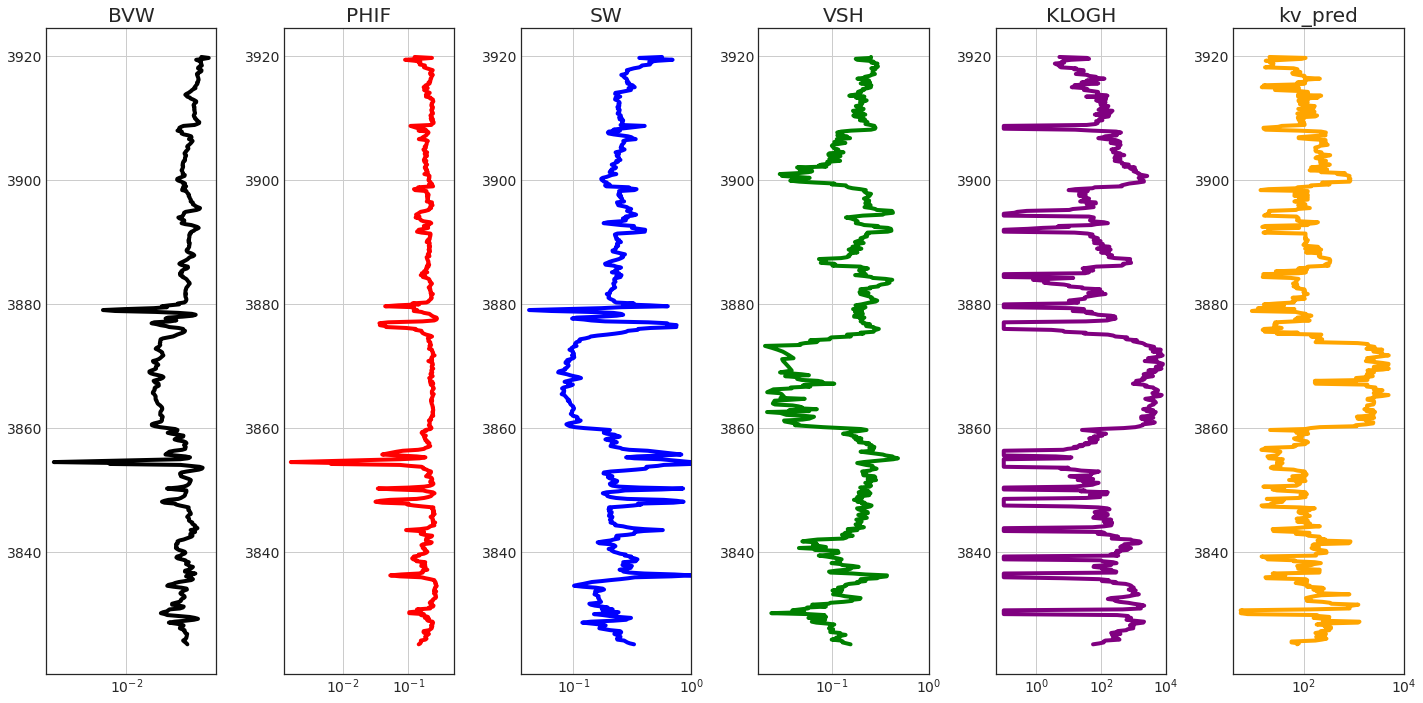

In [ ]:
# Display train well data
well = well_result 

# define what logs are we going to us
logs = ['BVW',	'PHIF',	'SW',	'VSH',	'KLOGH',	'kv_pred']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple','orange']

for i in range(len(logs)):
  if i == 4 or 5:
    
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
   
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

#ax[0].set_xlim(0, 0.1)
ax[1].set_xlim(0, 0.5)
ax[2].set_xlim(0, 1)
ax[3].set_xlim(0, 1)
ax[4].set_xlim(0, 10000)
ax[5].set_xlim(0, 10000)
plt.tight_layout(1.1)
plt.show()

In [ ]:
##final result

In [ ]:
well_train1

,DEPTH,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth
0,3837.13,0.05,0.20,0.25,0.13,182.01,275.35
1,3838.50,0.05,0.13,0.34,0.10,383.54,276.69
2,3839.41,0.04,0.15,0.27,0.09,430.91,314.69
3,3840.48,0.04,0.18,0.20,0.09,430.92,323.59
4,3841.39,0.04,0.22,0.17,0.10,421.01,92.59
...,...,...,...,...,...,...,...
91,3961.49,0.16,0.19,0.85,0.43,116.49,44.71
92,3962.40,0.16,0.19,0.85,0.43,92.22,59.21
93,3963.62,0.14,0.15,0.94,0.44,90.46,44.35
94,3964.53,0.08,0.08,1.00,0.44,88.14,32.68


In [ ]:
core_data.head(20)

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.50,nan,nan,17.00,nan,nan,nan,2.66,nan
1,3838.85,3837.25,1,2,nan,nan,nan,nan,14.80,nan,nan,nan,2.67,nan
2,3839.15,3837.55,1,3,25.20,21.40,3.94,3.16,10.80,nan,nan,nan,2.69,nan
3,3839.40,3837.80,1,4,1.02,0.69,nan,nan,12.80,nan,nan,nan,2.70,nan
4,3839.48,3837.88,1,5,nan,nan,nan,nan,nan,18.80,52.90,36.40,nan,2.68
5,3839.60,3838.00,1,6,524.00,491.00,nan,nan,16.40,nan,nan,nan,2.69,nan
6,3839.85,3838.25,1,7,274.00,253.00,nan,nan,16.50,nan,nan,nan,2.66,nan
7,3840.10,3838.50,1,8,1130.00,1080.00,1100.00,1040.00,17.20,nan,nan,nan,2.66,nan
8,3840.35,3838.75,1,9,442.00,412.00,nan,nan,16.90,nan,nan,nan,2.66,nan
9,3840.52,3838.92,1,10,nan,nan,nan,nan,nan,19.50,72.50,11.00,nan,2.68


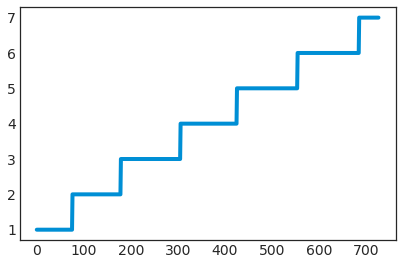

In [ ]:
plt.plot(core_data['CORE_NO'])

In [ ]:
print(well_train_iso.shape)
well_train_iso
#well_train_lof

(86, 7)


,BVW,PHIF,SW,VSH_FIL,KH_SMOOTH,CKV_smooth,DEPTH
0,-0.26,0.36,-0.62,-0.68,0.34,0.57,3837.13
1,-0.40,-0.80,-0.18,-0.98,0.79,0.58,3838.50
2,-0.64,-0.57,-0.48,-1.16,0.85,0.65,3839.41
3,-0.81,0.04,-0.88,-1.19,0.85,0.66,3840.48
4,-0.78,0.92,-1.09,-1.08,0.84,-0.03,3841.39
...,...,...,...,...,...,...,...
91,1.80,0.27,1.18,1.54,0.05,-0.44,3961.49
92,1.78,0.26,1.18,1.59,-0.11,-0.28,3962.40
93,1.61,-0.58,1.31,1.61,-0.12,-0.44,3963.62
94,0.78,-1.43,1.39,1.61,-0.14,-0.62,3964.53


In [ ]:
n = well_train_iso[target].values
scaler.fit(n.reshape(-1,1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [ ]:
CKV_smooth_ = scaler.inverse_transform(n.reshape(-1,1))

In [ ]:
CKV_smooth_ 

array([[ 4.35166312e-01],
       [ 4.37126949e-01],
       [ 4.88771826e-01],
       [ 4.99881975e-01],
       [-3.10345220e-02],
       [ 7.85953789e-02],
       [ 1.65740429e-02],
       [ 7.99933018e-02],
       [-7.93026597e-02],
       [-9.15063900e-02],
       [-1.83497657e-01],
       [-3.37977455e-01],
       [-3.29471020e-01],
       [-6.82620118e-01],
       [-1.21665745e+00],
       [-2.21339735e-01],
       [-1.88395669e-01],
       [ 1.12637375e+00],
       [ 1.40546353e+00],
       [ 9.45042199e-01],
       [-1.50555943e-01],
       [-8.26926972e-01],
       [-4.91365660e-01],
       [-3.37006026e-01],
       [-2.07180715e-01],
       [ 9.19959228e-02],
       [ 3.14911191e-01],
       [ 3.81968039e-01],
       [ 3.97515569e-01],
       [ 3.41540624e-01],
       [ 2.06360569e-01],
       [ 4.52546785e-02],
       [ 5.34958498e-02],
       [-7.66070856e-03],
       [-1.05035824e-01],
       [ 4.72410389e-03],
       [-5.78928205e-02],
       [ 6.14051869e-01],
       [ 7.9

In [ ]:
well

,DEPTH,BVW,PHIF,SW,VSH,KLOGH,kv_pred
0,3825.09,0.05,0.14,0.33,0.16,55.93,72.98
1,3825.24,0.05,0.15,0.30,0.14,87.22,78.76
2,3825.39,0.04,0.16,0.29,0.13,118.74,56.33
3,3825.54,0.04,0.16,0.28,0.13,118.14,56.33
4,3825.70,0.04,0.16,0.27,0.12,134.62,169.99
...,...,...,...,...,...,...,...
614,3919.27,0.06,0.12,0.52,0.24,6.87,17.11
615,3919.42,0.06,0.09,0.69,0.18,11.51,40.94
616,3919.58,0.07,0.15,0.48,0.18,42.22,90.04
617,3919.73,0.08,0.23,0.36,0.25,36.27,107.59


In [ ]:
well.to_csv('/content/sample_data/corewell1.csv', index=False)

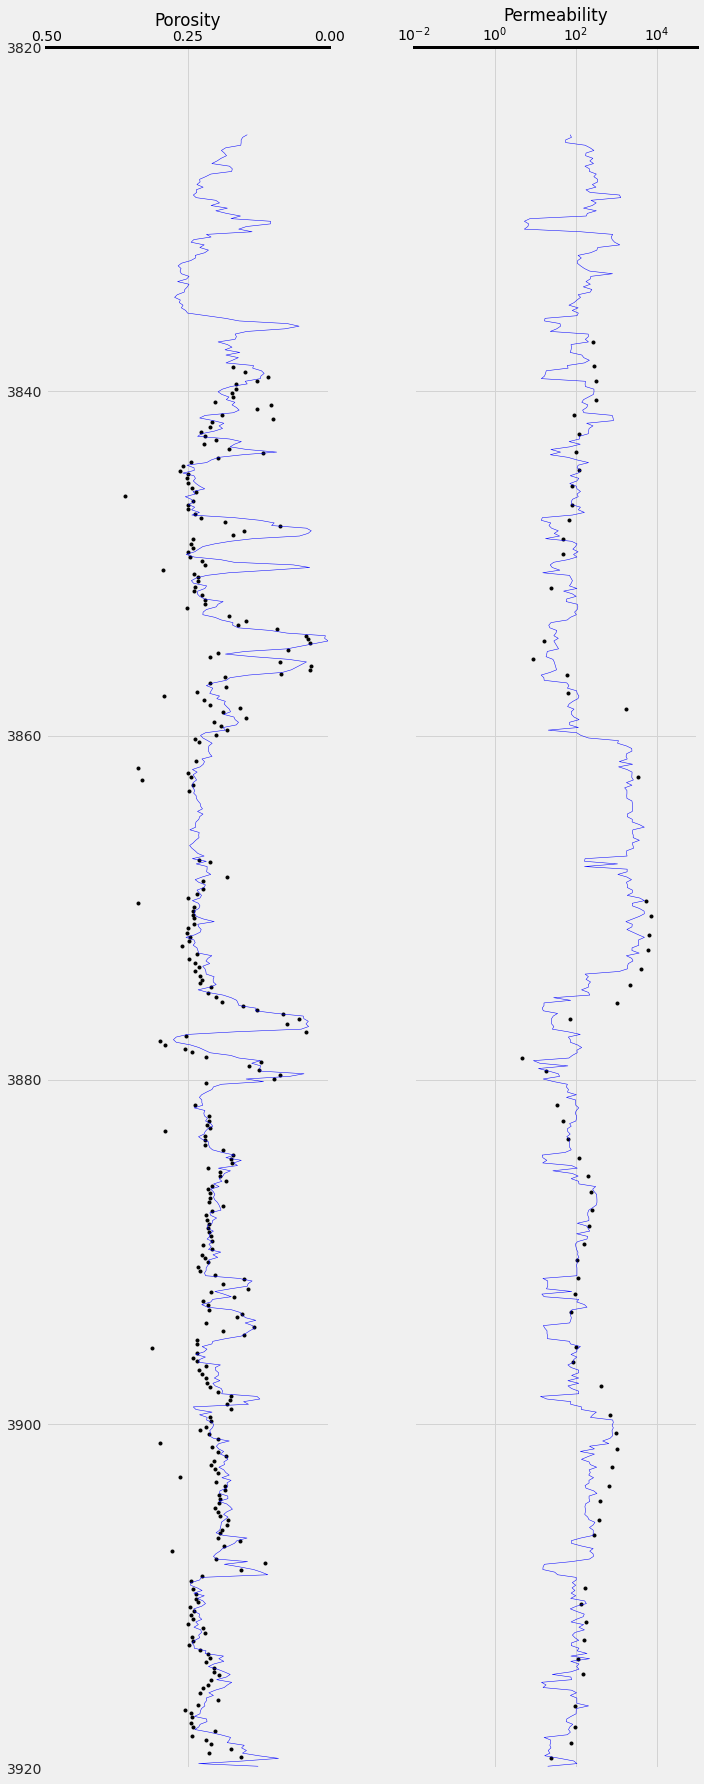

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,25))
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1, sharey = ax1)

# Porosity track
ax1.plot(core_data["CPOR"]/100, core_data['DEPTH'], color = "black", marker='.', linewidth=0)
ax1.plot(well['PHIF'], well['DEPTH'], color ='blue', linewidth=0.5)
ax1.set_xlabel("Porosity")
ax1.set_xlim(0.5, 0)
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.set_xticks([0.5,  0.25, 0])

# Permeability track
# Permeability track
ax2.plot(well_["CKV_smooth"], well_['DEPTH'], color = "black", marker='.', linewidth=0)
ax2.plot(well_result['kv_pred'], well_result['DEPTH'], color ='blue', linewidth=0.5)
ax2.set_xlabel("Permeability")
ax2.set_xlim(0.1, 100000)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([0.01, 1, 10, 100, 10000])
ax2.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2]:
    ax.set_ylim(3920, 3820)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
# Removes the y axis labels on the second track
for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
fig.suptitle('', size=15, y=1.05)
plt.savefig('final_track_plot.png', dpi=100)

In [ ]:
df = pd.read_csv("/content/sample_data/well1.csv")
df

,PHIF,SW,VSH,BVW,HMR,KLOGH,WELL,DEPTH,Kv
0,0.144541,0.3270,0.156524,0.046757,19.670246,55.9256,15_9-19 A,3825.0876,81.875911
1,0.152656,0.3018,0.142291,0.045823,23.903325,87.2229,15_9-19 A,3825.2400,192.645833
2,0.155366,0.2870,0.129816,0.044503,27.644925,118.7372,15_9-19 A,3825.3924,309.983556
3,0.155376,0.2778,0.130068,0.043084,27.574498,118.1406,15_9-19 A,3825.5448,309.983556
4,0.155912,0.2694,0.124243,0.041985,29.384311,134.6203,15_9-19 A,3825.6972,304.529500
...,...,...,...,...,...,...,...,...,...
614,0.124437,0.5189,0.239845,0.062585,7.429712,6.8690,15_9-19 A,3919.2708,47.325689
615,0.089328,0.6935,0.183718,0.058432,11.352290,11.5121,15_9-19 A,3919.4232,44.442333
616,0.152183,0.4835,0.176883,0.070157,16.656165,42.2198,15_9-19 A,3919.5756,105.800189
617,0.230502,0.3624,0.253825,0.080345,12.544634,36.2736,15_9-19 A,3919.7280,89.454433


In [ ]:
column = ['DEPTH','WELL', 'PHIF',	'SW',	'VSH',	'BVW'	,'HMR',	'KLOGH']
df1 = df[column]
df1

,DEPTH,WELL,PHIF,SW,VSH,BVW,HMR,KLOGH
0,3825.0876,15_9-19 A,0.144541,0.3270,0.156524,0.046757,19.670246,55.9256
1,3825.2400,15_9-19 A,0.152656,0.3018,0.142291,0.045823,23.903325,87.2229
2,3825.3924,15_9-19 A,0.155366,0.2870,0.129816,0.044503,27.644925,118.7372
3,3825.5448,15_9-19 A,0.155376,0.2778,0.130068,0.043084,27.574498,118.1406
4,3825.6972,15_9-19 A,0.155912,0.2694,0.124243,0.041985,29.384311,134.6203
...,...,...,...,...,...,...,...,...
614,3919.2708,15_9-19 A,0.124437,0.5189,0.239845,0.062585,7.429712,6.8690
615,3919.4232,15_9-19 A,0.089328,0.6935,0.183718,0.058432,11.352290,11.5121
616,3919.5756,15_9-19 A,0.152183,0.4835,0.176883,0.070157,16.656165,42.2198
617,3919.7280,15_9-19 A,0.230502,0.3624,0.253825,0.080345,12.544634,36.2736


In [ ]:
df1.rename(columns = {'KLOGH':'Kh'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1

,DEPTH,WELL,PHIF,SW,VSH,BVW,HMR,Kh
0,3825.0876,15_9-19 A,0.144541,0.3270,0.156524,0.046757,19.670246,55.9256
1,3825.2400,15_9-19 A,0.152656,0.3018,0.142291,0.045823,23.903325,87.2229
2,3825.3924,15_9-19 A,0.155366,0.2870,0.129816,0.044503,27.644925,118.7372
3,3825.5448,15_9-19 A,0.155376,0.2778,0.130068,0.043084,27.574498,118.1406
4,3825.6972,15_9-19 A,0.155912,0.2694,0.124243,0.041985,29.384311,134.6203
...,...,...,...,...,...,...,...,...
614,3919.2708,15_9-19 A,0.124437,0.5189,0.239845,0.062585,7.429712,6.8690
615,3919.4232,15_9-19 A,0.089328,0.6935,0.183718,0.058432,11.352290,11.5121
616,3919.5756,15_9-19 A,0.152183,0.4835,0.176883,0.070157,16.656165,42.2198
617,3919.7280,15_9-19 A,0.230502,0.3624,0.253825,0.080345,12.544634,36.2736
